In [1]:
import ilm.main
import torch
import tqdm

100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


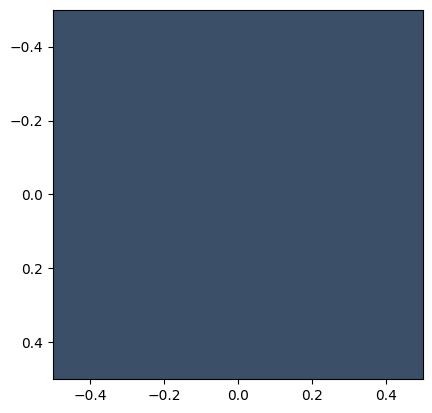

100%|██████████| 4/4 [00:00<00:00, 83.01it/s]


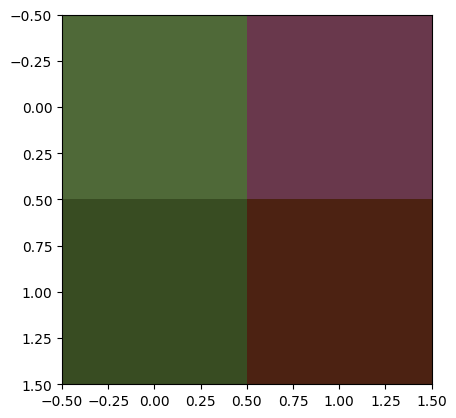

100%|██████████| 16/16 [00:00<00:00, 125.86it/s]


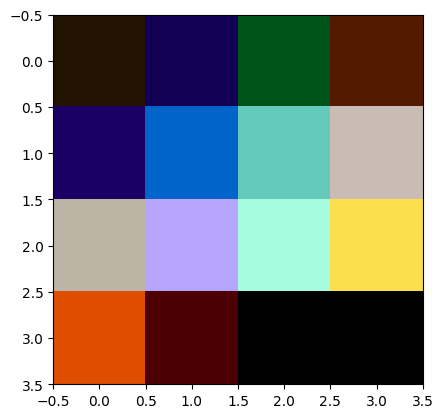

100%|██████████| 256/256 [00:02<00:00, 124.04it/s]


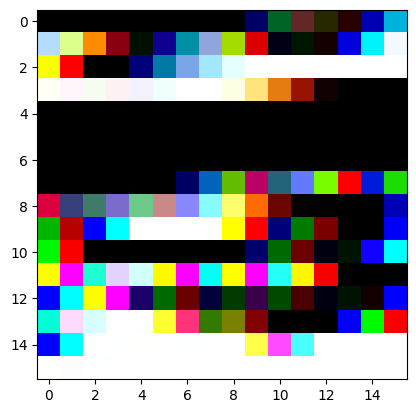

100%|██████████| 1024/1024 [00:09<00:00, 102.79it/s]


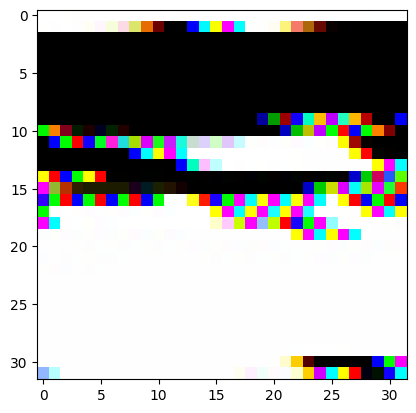

In [2]:
import numpy as np
import matplotlib.pyplot as plt

model = ilm.main.ILM().to('cuda')
state = torch.load('./saves.pth', map_location='cuda')['model']
model.load_state_dict(state)
model.eval()
temperature = 0.5

def sample(logits: torch.Tensor):
    return torch.argmax(logits)
    return torch.multinomial((logits / temperature).softmax(-1), 1)

ids = [[256, 256, 256]]
for i in [1, 2, 4, 16, 32]:
    for j in tqdm.tqdm(range(i*i)):
        input_ids = torch.tensor(ids, dtype=torch.long, device='cuda')[None, :, :]
        with torch.inference_mode():
            logits = model(input_ids, return_logits=True)[0, -1]
        logits = logits.clone()
        logits[:, 256:] = -32000
        r_idx = sample(logits[0]).item()
        g_idx = sample(logits[1]).item()
        b_idx = sample(logits[2]).item()
        idx = (r_idx + g_idx + b_idx) // 3
        ids.append([r_idx, g_idx, b_idx])
        # ids.append([idx, idx, idx])
    pixels = np.array(ids[-(i*i):]).reshape(i, i, 3)
    plt.imshow(pixels)
    plt.show()